Project: 4 Hybrid Movie Recommender

Problem Statement:
Use both collaborative and content-based filtering to recommend movies.

In [28]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
os.chdir(os.getcwd().replace('notebooks', 'data'))

user_interactions = pd.read_csv('user_interactions.csv')


In [5]:
user_interactions.columns = user_interactions.columns.str.replace(' ', '_')


In [6]:
user_interactions.sample(5)


,user_id,movie_id,rating,liked,watched_at,title,poster_path,tags
964,28,3582,1.7,0,2024-05-18,News of the World,https://image.tmdb.org/t/p/original//fYQCgVRsQ...,"['A', 'Texan', 'traveling', 'across', 'the', '..."
1128,33,5501,1.9,0,2024-09-05,He's All That,https://image.tmdb.org/t/p/original//kW3AG5NHo...,"['To', 'get', 'revenge', 'on', 'her', 'ex-boyf..."
1487,44,6079,2.4,0,2025-05-06,You Can't Save Yourself Alone,https://image.tmdb.org/t/p/original//uVhJKrNYi...,"['Gaetano', 'and', 'Delia,', 'a', 'separated',..."
1622,48,5548,2.3,0,2024-11-20,Alice in Wonderland,https://image.tmdb.org/t/p/original//o0kre9wRC...,"['Alice,', 'now', '19', 'years', 'old,', 'retu..."
1095,32,6291,1.9,0,2024-09-04,Madagascar: Escape 2 Africa,https://image.tmdb.org/t/p/original//agRbLOHgN...,"['Alex,', 'Marty,', 'and', 'other', 'zoo', 'an..."


In [30]:
user_interactions['watched_duration'] = user_interactions['watched_at'].apply(lambda x:random.randint(15,200))


In [31]:
user_interactions.iloc[0]


user_id                                                             1
movie_id                                                          258
rating                                                            1.0
liked                                                               0
watched_at                                                 2024-07-12
title                                  Guardians of the Galaxy Vol. 3
poster_path         https://image.tmdb.org/t/p/original//r2J02Z2Op...
tags                ['Peter', 'Quill,', 'still', 'reeling', 'from'...
watched_duration                                                  142
Name: 0, dtype: object

In [32]:
df = user_interactions.copy()


In [41]:
ratings_pivot = df.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)
liked_pivot   = df.pivot_table(index='user_id', columns='movie_id', values='liked').fillna(0)
watched_duration_pivot   = df.pivot_table(index='user_id', columns='movie_id', values='watched_duration').fillna(0)


In [42]:

user_features = pd.concat([ratings_pivot, liked_pivot, watched_duration_pivot], axis=1, keys=['rating', 'liked', 'watched_duration'])


In [43]:
user_features.head()


rating                                               ...  \
movie_id   8    9    10   14   19   27   35   40   42   44    ...   
user_id                                                       ...   
1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3           0.0  0.0  4.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
5           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

         watched_duration                                               
movie_id             9906 9909 9923 9927 9945 9959 9963 9966 9976 9979  
user_id                                                                 
1                     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2                     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3                     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4                     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5                    39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 4623 columns]

In [46]:
ratings = user_features['rating']
liked = user_features['liked']
duration = user_features['watched_duration']

# Combine them into a score
score = ratings + liked * 0.5 + duration
pivot_df = score


In [47]:
pivot_df.head()


movie_id,8,9,10,14,19,27,35,40,42,44,...,9906,9909,9923,9927,9945,9959,9963,9966,9976,9979
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,127.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
user_movie_matrix = pivot_df.copy()


In [49]:
user_movie_matrix.head()


movie_id,8,9,10,14,19,27,35,40,42,44,...,9906,9909,9923,9927,9945,9959,9963,9966,9976,9979
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,127.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

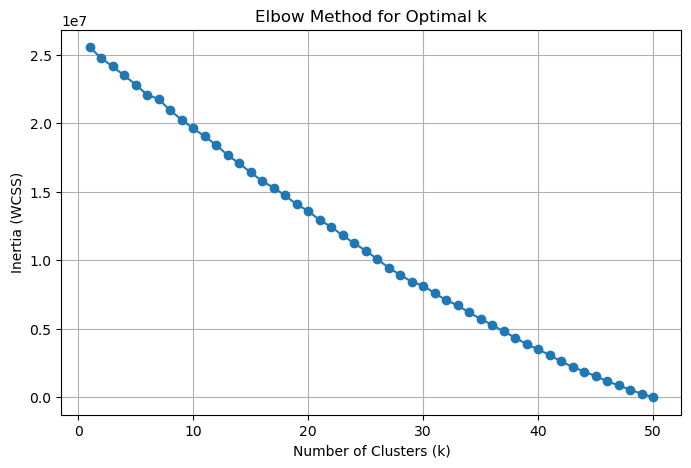

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume `pivot_df` is the user-movie score matrix (user_id as index)
inertia = []
K = range(1, 51)

for k in K:
    model = KMeans(n_clusters=k, random_state=10)
    model.fit(pivot_df)
    inertia.append(model.inertia_)  # Sum of squared distances to cluster centers

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_movie_matrix)


c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

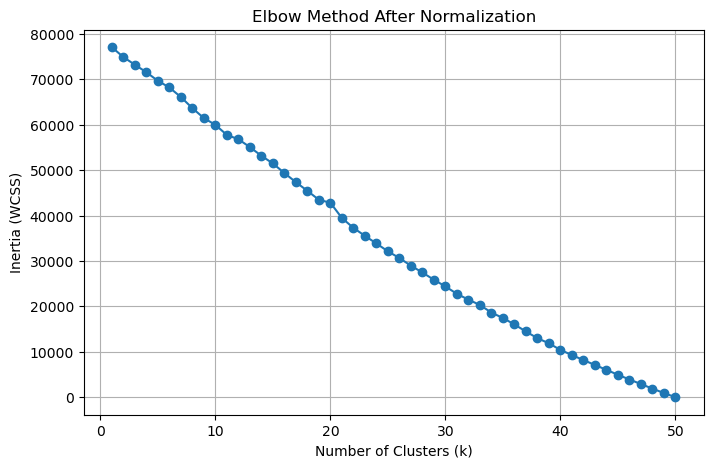

In [57]:
inertia = []
K = range(1, 51)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method After Normalization')
plt.grid(True)
plt.show()


In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=25, random_state=50)
user_clusters = kmeans.fit_predict(user_movie_matrix)

# Assign cluster to each user
user_movie_matrix['cluster'] = user_clusters


c:\Users\bagam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
# Merge cluster info into full_df
df = df.merge(user_movie_matrix['cluster'], on='user_id')


In [62]:
df.head(10)


,user_id,movie_id,rating,liked,watched_at,title,poster_path,tags,watched_duration,score,cluster
0,1,258,1.0,0,2024-07-12,Guardians of the Galaxy Vol. 3,https://image.tmdb.org/t/p/original//r2J02Z2Op...,"['Peter', 'Quill,', 'still', 'reeling', 'from'...",142,143.0,16
1,1,3583,3.1,0,2025-03-12,Chip 'n Dale: Rescue Rangers,https://image.tmdb.org/t/p/original//7UGmn8TyW...,"['Decades', 'since', 'their', 'successful', 't...",147,150.1,16
2,1,4080,2.0,0,2024-08-31,A Perfect Pairing,https://image.tmdb.org/t/p/original//h65lLhYEf...,"['To', 'land', 'a', 'major', 'client,', 'an', ...",152,154.0,16
3,1,5189,2.2,0,2025-02-10,I Am Mother,https://image.tmdb.org/t/p/original//b3jWxwWRF...,"['A', 'teenage', 'girl', 'is', 'raised', 'unde...",87,89.2,16
4,1,5602,4.3,1,2024-09-29,The Nutty Professor,https://image.tmdb.org/t/p/original//a3lzU19j7...,"['A', 'timid,', 'nearsighted', 'chemistry', 't...",53,57.4,16
5,1,4230,3.3,0,2025-01-08,The Private Life of Sherlock Holmes,https://image.tmdb.org/t/p/original//vQSYu0DXk...,"['Holmes', 'and', 'Dr.', 'Watson', 'take', 'on...",42,45.3,16
6,1,2237,2.5,0,2025-01-16,Venus in Fur,https://image.tmdb.org/t/p/original//b9pCYixO3...,"['An', 'enigmatic', 'actress', 'may', 'have', ...",162,164.5,16
7,1,7772,4.7,1,2024-12-25,Kill List,https://image.tmdb.org/t/p/original//qwT2I3ons...,"['Nearly', 'a', 'year', 'after', 'a', 'botched...",146,150.8,16
8,1,9242,2.6,0,2024-10-27,Breathless,https://image.tmdb.org/t/p/original//Abh2Mra3l...,"['Jesse', 'has', 'to', 'get', 'out', 'of', 'La...",188,190.6,16
9,1,7065,1.7,0,2025-03-27,Beastly,https://image.tmdb.org/t/p/original//70ApMWwuu...,"['A', 'modern-day', 'take', 'on', 'the', '""Bea...",155,156.7,16


In [63]:
# Example: Find popular movies in cluster 1
cluster_id = 1
cluster_movies = df[df['cluster'] == cluster_id]

top_movies = (
    cluster_movies.groupby(['movie_id', 'title'])['rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(top_movies)


movie_id  title                
9498      Spy Kids                 5.0
8658      Hellhole                 4.8
5276      Serial (Bad) Weddings    4.7
7597      The Expendables 3        4.6
8687      Vertical Limit           4.0
9444      Lost River               3.9
9099      Battle of the Classes    3.9
2571      Murder by Death          3.8
1082      Les Misérables           3.7
2732      No                       3.6
Name: rating, dtype: float64


In [68]:
movie_id = 500  # Guardians of the Galaxy Vol. 3

cluster_ratings = (
    df[df['movie_id'] == movie_id]
    .groupby('cluster')['rating']
    .mean()
    .sort_values(ascending=False)
)


In [74]:
best_cluster = cluster_ratings.index[0]


In [76]:
# Example: Find popular movies in cluster 1
cluster_id = best_cluster
cluster_movies = df[df['cluster'] == cluster_id]

top_movies = (
    cluster_movies.groupby(['movie_id', 'title'])['rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(top_movies)


movie_id  title                                
9322      Mutant Pumpkins from Outer Space         4.9
2924      Straw Dogs                               4.9
2181      I'm Not Ashamed                          4.6
5289      The Wizard of Lies                       4.6
500       Winter Light                             4.5
8569      Shark Tale                               4.5
117       The Apartment                            4.4
3662      The Platform                             4.4
7372      Daddy's Home                             4.4
7615      Scooby-Doo! Curse of the Lake Monster    4.3
Name: rating, dtype: float64
